<a href="https://colab.research.google.com/github/rfarwell/MPhys/blob/main/Date_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Histogram of death timepoints**
This code produces histograms for the frequency of death occurring within certain timepoints. It has been designed to allow for the production of three different histograms (only differing by bin size). The three time intervals used here are: 1 year, 6 months and 3 months. 

Import relevant libraries and mount to GoogleDrive

In [3]:
import numpy as np
import matplotlib.pyplot
from google.colab import drive
import os
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Define the filepath to the clinical data csv file

In [4]:
project_folder = "/content/gdrive/MyDrive/Data"
clinical_data_filename = "NSCLC-Radiomics-Clinical-Data.csv"
print(os.path.join(project_folder, clinical_data_filename))

/content/gdrive/MyDrive/Data/NSCLC-Radiomics-Clinical-Data.csv


Select the relevant information from the metadata file. The relevant information is the patient ID, dead statuses and the timepoint of the most recent patient follow-up.

In [68]:
metadata_filepath = os.path.join(project_folder, clinical_data_filename)
#print(f'Metadata_filepath: {metadata_filepath}')

metadata = np.genfromtxt(metadata_filepath, comments = '%', dtype="str", delimiter=",")
#print(f'Metadata: {metadata}')

patient_IDs = metadata[:,0]
dead_statuses = metadata[:,9]
#print(dead_statuses)
timepoints = metadata[:,8]

Creating an array of when all the dead patients died. This will be used for the production of a histogram.

In [91]:
clinical_data = []
dead_dates = [] # An array of when all the dead patients died
alive_dates = []
for i in range(len(patient_IDs)) :
  if dead_statuses[i] == '1' :
    #print(dead_statuses[i], timepoints[i])
    dead_dates.append(timepoints[i])
  elif dead_statuses[i] == '0' :
    alive_dates.append(timepoints[i])

dead_dates = np.array(dead_dates, dtype = np.int32)
alive_dates = np.array(alive_dates, dtype = np.int32)
# print(dead_dates)
# print(alive_dates)


In [97]:
histogram_range = 10*365 #10 years
#number_of_histogram_bins = 10 #1 bin per year
#number_of_histogram_bins = 20 #2 bin per year
number_of_histogram_bins = 40 #4 bin per year

# plt.figure(figsize=(15,10))
# plt.hist(dead_dates, range = (0, histogram_range), bins = number_of_histogram_bins)
# plt.xticks(np.arange(0, histogram_range, histogram_range/number_of_histogram_bins), fontsize = 15, rotation = 90)
# plt.yticks(fontsize = 15)
# plt.xlabel('Timepoints', fontsize = 20)
# plt.ylabel('Frequency', fontsize = 20)
# plt.title('Frequency of death dates with bin size of 3 months', fontsize = 20)
# plt.show()

Making a different histogram to account for people who are alive at the end of 8 years. This means that we will have 9 categories: one for each year, up to 8 years and then one for anyone who lived longer.

Number of right-censored patients: 16. This means that they were last seen alive before 8 years and so we have no information about them at the 8 year point so are ignored.


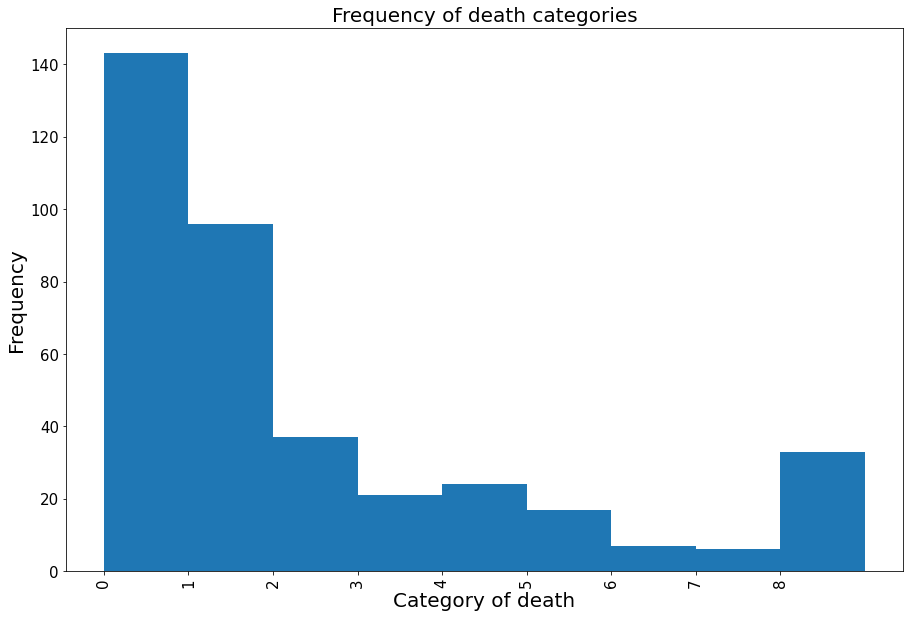

In [107]:
import math
classes_of_death_time = [] #Create empty array that I will append to later in the code
interval = 365
right_censored_counter = 0
death_categories = []
for i in range(len(dead_dates)) :
  if 0 < dead_dates[i] <= 365*8 :
    death_categories.append(math.ceil(dead_dates[i]/365)-0.5)
  elif 365*8 < dead_dates[i] :
    death_categories.append(8.5)

for i in range(len(alive_dates)) :
  if alive_dates[i] > 365*8 :
    death_categories.append(8.5)
  else:
    right_censored_counter += 1

print(f'Number of right-censored patients: {right_censored_counter}. This means that they were last seen alive before 8 years and so we have no information about them at the 8 year point so are ignored.')


plt.figure(figsize=(15,10))
plt.hist(death_categories, range = (0, 9), bins = 9, cumulative = False)
plt.xticks(np.arange(0, 9, 1), fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.xlabel('Category of death', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.title('Frequency of death categories', fontsize = 20)
plt.show()